<b>What is time series decomposition?<b>
    
Simply put, time series decomposition is a process of deconstructing a time series into the following components:
    
    Trend — general movement over time   
    Seasonal — behaviors captured in individual seasonal periods
    Residual — everything not captured by trend and seasonal components
    
This technique is most often used for analyzing historical time series data. It’s also sometimes used for forecasting. Modeling trend and seasonality at once might be a too difficult task, so tackling components individually might be a better approach.
Today’s article is focused only on analysis. We’ll leave forecasting for some other time. Import the following libraries to follow along:

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

Decomposing time series will require you to specify the modeling type. In a nutshell, this tells Python how the components should be combined to produce the original time series. You’ll learn about two approaches — additive (add the components) and multiplicative (multiply the components).

<b>Additive vs. multiplicative time series components<b>
    
There are two techniques for combining time series components:
    
    Additive
    Multiplicative
    
We care about these because time series decomposition requires you to specify a model type for the seasonal component. The default is additive, but you can easily change that.
The term additive means individual components (trend, seasonality, and residual) are added together:

y = T+S+R

An additive trend indicates a linear trend, and an additive seasonality indicates the same frequency (width) and amplitude (height) of seasonal cycles.

The term multiplicative means individual components (trend, seasonality, and residuals) are multiplied together:


Y = TxSxR

A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing frequency (width) and/or amplitude (height) of seasonal cycles.

Both trend and seasonality can be additive or multiplicative, which means there are four ways these can be combined:

    Additive trend and additive seasonality
    Additive trend and multiplicative seasonality
    Multiplicative trend and additive seasonality
    Multiplicative trend and multiplicative seasonality
    
<b>Additive trend and additive seasonality<b>
    
Additive trend means the trend is linear (straight line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.
    
The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and seasonality:

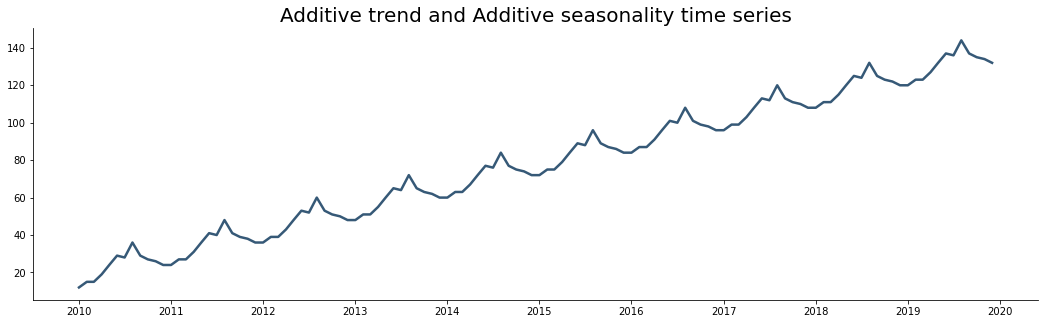

In [3]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_aa);

As you can see, the time series shows a linear trend and seasonality that doesn’t change over time. It’s not the most typical-looking time series, as most likely the amplitude of a seasonal period will change with an increasing trend.

<b>Additive trend and multiplicative seasonality<b>
    
Additive trend means the trend is linear (straight line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.
    
The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and multiplicative seasonality:

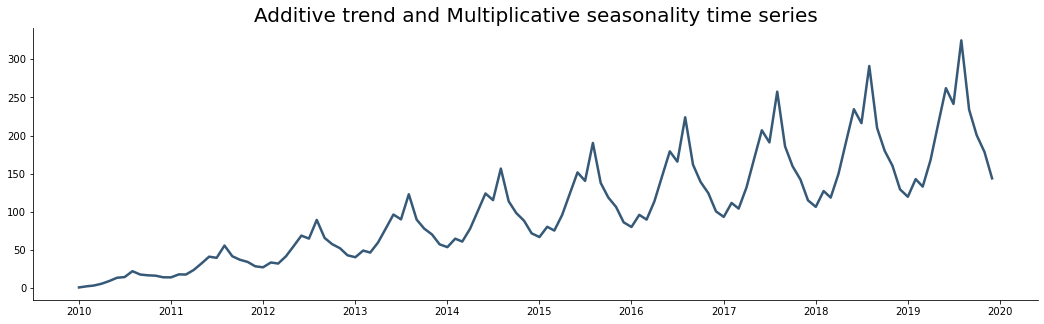

In [4]:

# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# Immitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Multiplicative seasonality time series', size=20)
plt.plot(df_am);

Once again, the trend is linear, but the heights of seasonal periods have increased over time. This behavior is typical to many time series for obvious reasons — more volume (an overall increase on the y-axis) introduces more volatility in a single season.

<B>Multiplicative trend and additive seasonality<b>
    
Multiplicative trend means the trend is not linear (curved line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.
    
The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and additive seasonality:


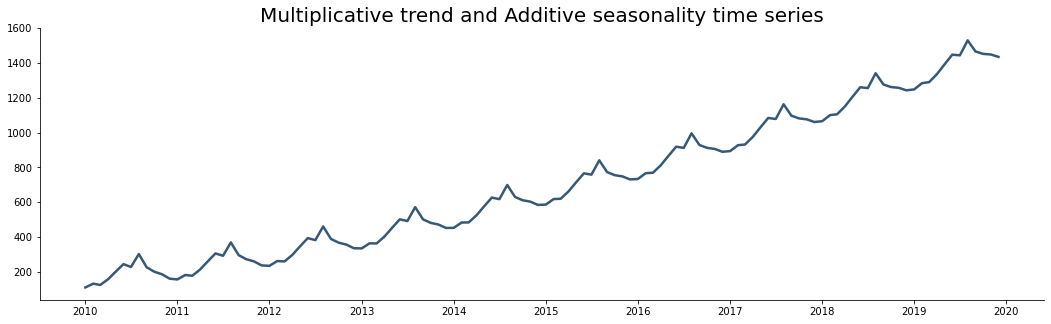

In [5]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.5 power to get upwards "curved" trend
x_range = np.array([x**1.5 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_ma = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Additive seasonality time series', size=20)
plt.plot(df_ma);

You can see how the trend is slightly curved. I haven’t seen too many time series shaped like this because seasonal periods tend to differ in amplitude as the y-axis value increases. But, it’s still a possible scenario.

<b>Multiplicative trend and multiplicative seasonality<b>
    
Multiplicative trend means the trend is not linear (curved line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.
    
The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and multiplicative seasonality:

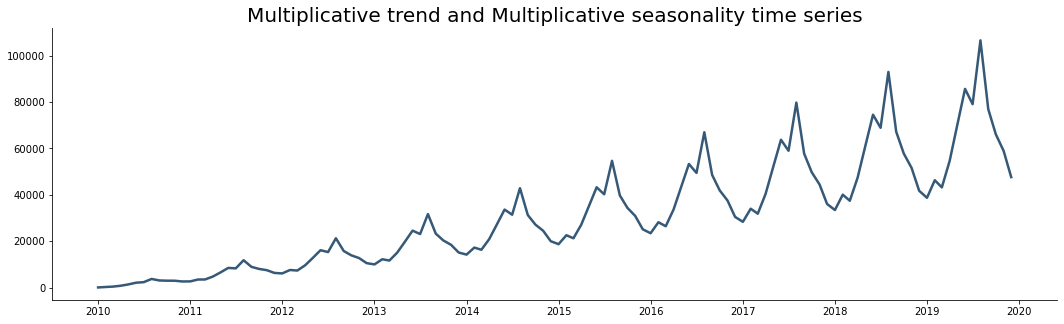

In [6]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

This is another widespread type of pattern in time series data. You’ll see it often in sales data, for example, when demand for a specific product/service increases over time, but most of the sales are made in summer months (think airplane tickets).

<b>Decomposition in action<b>
    
The seasonal_decompose() function from statsmodels excepts at least two parameters:
    
    *x: array* — your time series.
    *model: str* — type of seasonal component, can be either additive or multiplicative. The default value is additive.
    
Having that in mind, let’s decompose our df_aa — a time series with both: additive trend and seasonality:

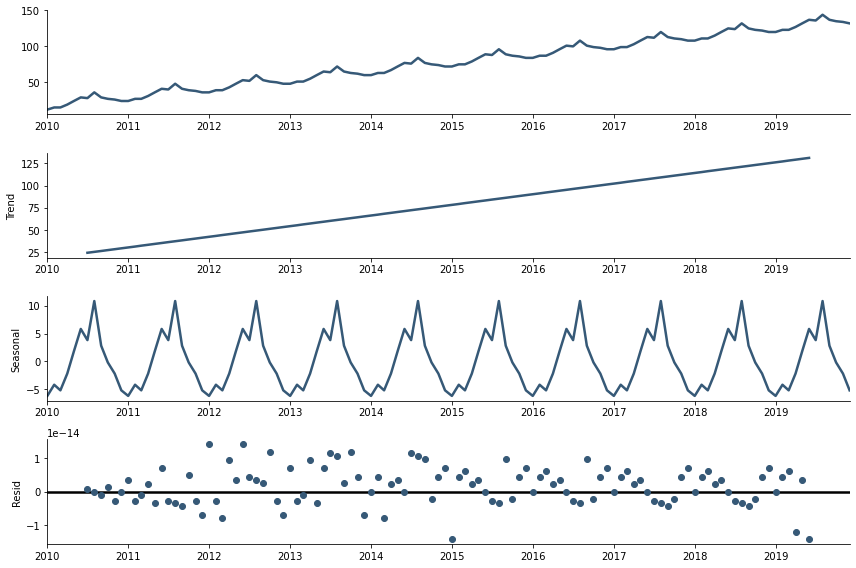

In [7]:
# Change the default figsize
rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = seasonal_decompose(df_aa, model='additive')
decomposed.plot();

Both trend and seasonal components were captured decently, to say at least. As the data is synthetic, we know the trend is always going up, and the seasonal component looks like it should. The residuals should be centered around zero and normally distributed. Further, no distinct pattern should be visible in the residuals. That claim holds though most of the time series.

Next, let’s see what happens if you apply an additive decomposition model to df_mm — a time series with both multiplicative trend and seasonality:

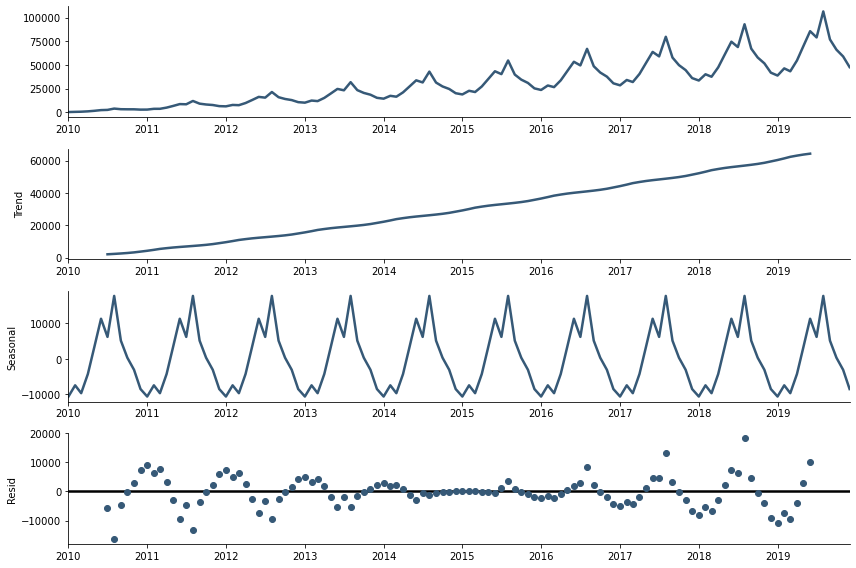

In [8]:

# Decompose and plot
decomposed = seasonal_decompose(df_mm, model='additive')
decomposed.plot();

Just look at these residuals. They are centered around -200 and have a huge standard deviation, and also show a distinct pattern that an additive model didn’t capture.

Let’s fit a multiplicative decomposition model to the same df_mm dataset and see what happens:


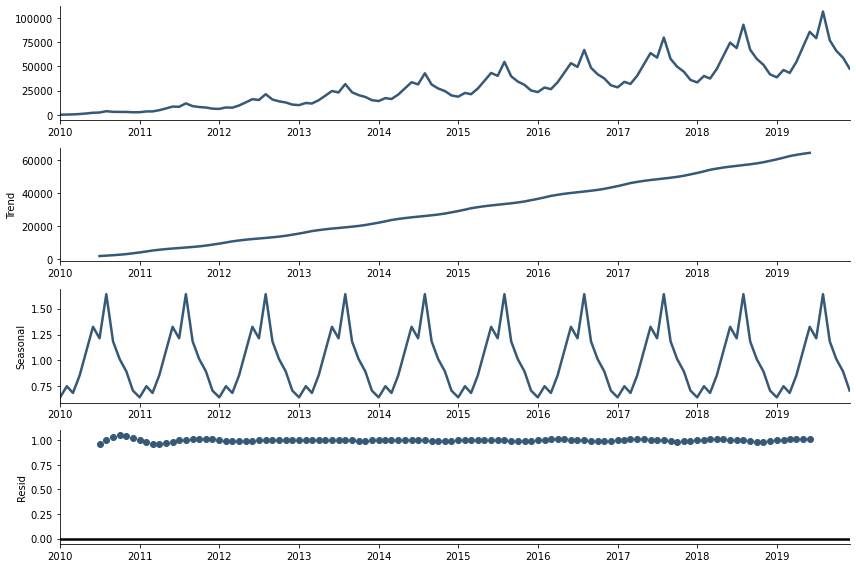

In [9]:

# Decompose and plot
decomposed = seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();